<a href="https://colab.research.google.com/github/ksh-dong/Python25Study/blob/main/06_01_%EA%B5%B0%EC%A7%91%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 비지도학습 : 타깃이 없는 데이터를 사용하는 것을 말함
# 타깃이 없다는 것은 정답이 없어 알고리즘이 예측을 해야 함
# 딥러닝 : 우리가 정답을 알려주지 않아도 스스로 판단함.

In [1]:
# MBC 마켓에서 이벤트를 진행하기로 하였다.
# 본인 구매한 과일 사진을 홈페이지에 업로드하면 추첨을 하여 상품을 제공하려함

# 고객이 올린 사진을 학습하여 과일을 분류 해본다.
# 비지도 학습 : Unsupervised Learning
# 사람이 가르쳐 주지않아도 데이터에 있는 무언가를 학습함

# 비법 : 사진의 픽셀값을 모두 평균내면 비슷한 과일끼리 모일까??
# 과일사진 300개를 준비하여 분류를 해보자.

!wget https://bit.ly/fruits_300_data -O fruits_300.npy
# 과일사진 데이터 준비(캐글에 공개된 데이터 셋) - 대문자0

--2025-11-11 05:22:21--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-11 05:22:21--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-11 05:22:21--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')  # 저장된 파일을 불러와 배열로 처리함
# fruits는 넘파이 배열이고
# fruits_300.npy 파일에 들어 있는 모든 데이터를 담는다.

In [5]:
print(fruits.shape)
# 샘플개수, 이미지높이, 이미지너비 -> 과일사진300장, 해상도 100X100
# https://www.kaggle.com/ 캐글에가면 데이터셋이 많음

(300, 100, 100)


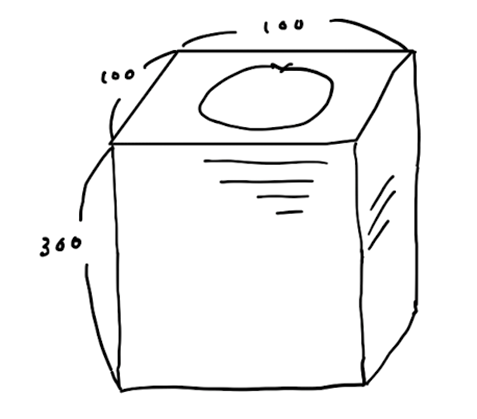

In [6]:
print(fruits[0, 0, :])    # 3차원 배열임 0번행, 0번열, 모든값

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


In [7]:
print(fruits[0, 50, :]) # 3차원 배열임 0번행, 50번열, 모든값

[  5   1   1   3   2  45  84  78  76  74  76  75  74  75  72  67  65  65
  64  63  62  60  59  62  58  55  54  54  53  52  50  49  51  52  53  53
  54  56  59  62  65  67  71  74  76  79  83  86  90  94  97  99 102 105
 108 112 115 120 124 127 133 138 143 149 155 156 157 162 170 174 175 176
 181 187 194 201 204 206 210 216 222 225 228 232 234 236 237 237 237 235
 237 238 234 229 114   1   1   1   1   1]


In [8]:
print(fruits[0, 99, :]) # 3차원 배열임 0번째행, 99번열, 모든값

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   3   6
   4   1   1   1   1   2   1   1   1   2   3   2  81 141 172 175 146 118
 127 153 180 236  65   2   4   1   4   5   6   4   1   6   1   1   6   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


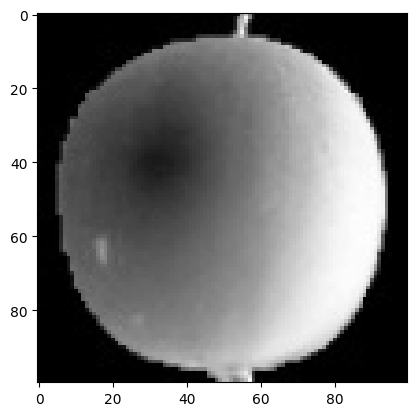

In [11]:
plt.imshow(fruits[0], cmap='gray')
plt.show()    # 넘파이에서는 흑백사진을 반전시켜 보인다. (검정<->흰색)

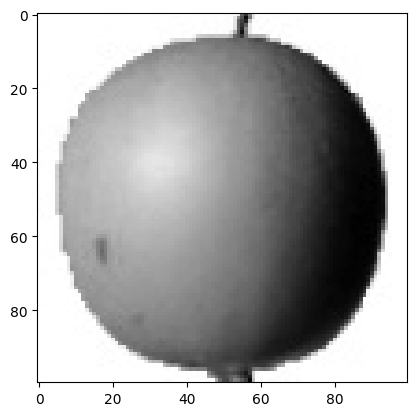

In [13]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

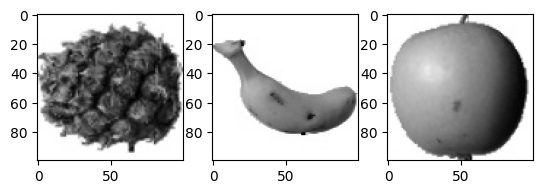

In [17]:
fig, axs = plt.subplots(1, 3)
# subplots() 함수는 맷플롯립의 함수로 여러개의 그래프를 배열처럼 쌓을 수 있도록 도와줌
# subplots(1,2) 하나의 행과 2개의 열 -> 반환되는 axs는 2개의 서브 그래프를 담고 있는 배열임

axs[0].imshow(fruits[130], cmap='gray_r')   # 100~199(파인애플)
axs[1].imshow(fruits[230], cmap='gray_r')   # 200~299(바나나)
axs[2].imshow(fruits[30], cmap='gray_r')    # 0~99(사과)
# axs[0]에 파인애플 이미지를, axs[1]에 바나나 이미지를 그림

plt.show()

In [20]:
# 픽셀값 분석하기 위해 넘파이 배열을 나눌때 100X100 이미지를 펼쳐서 10,000인 1차원 배열로 만듬

apple = fruits[0:100].reshape(-1, 100*100)        # 사과용 100개의 사진에 10000픽셀 특성
pineapple = fruits[100:200].reshape(-1, 100*100)  # 파인애플용 100개의 사진에 10000픽셀 특성
banana = fruits[200:300].reshape(-1, 100*100)     # 바나나용 100개의 사진에 10000픽셀 특성

# fruits 배열에서 순서대로 100개씩 선택하기 위해 슬라이싱 연산자를 활용
# reshape() 메서드를 이용해서 두번째 차원(가로) 100, 세번째 차원(세로) 100을 곱해 10,000개를 만듬
# reshape(-1, )로 지정하면 자동으로 남은 차원을 할당한다. (첫번째 차원이 샘플 개수)

print(apple.shape)


(100, 10000)


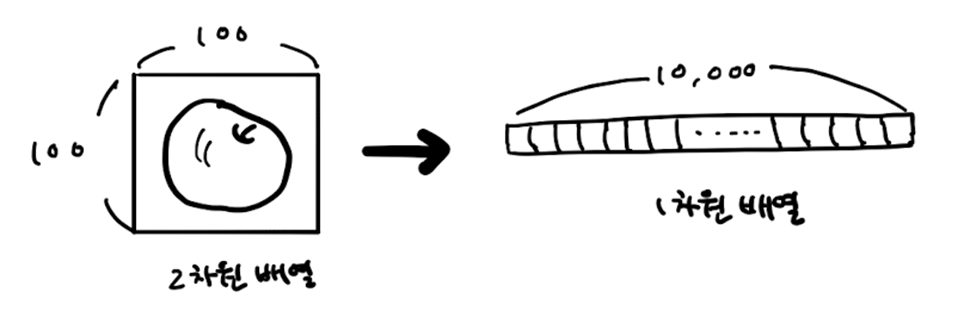

In [21]:
print(pineapple.shape)

(100, 10000)


In [22]:
print(banana.shape)

(100, 10000)


In [25]:
# mean() 평균 구하는 함수
# axis 중심선(배열의 축) axis=0 행을 따라 계산, axis=1은 열을 따라 계산
# 우리가 필요한 것은 샘플의 평균값 (샘플을 모두 가로로 값을 나열 했으니 axis=1)
print(apple.mean(axis=1))   # 8 x 12 + 4 = 100개 -> 사과 하나하나에 대한 픽셀의 평균임

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


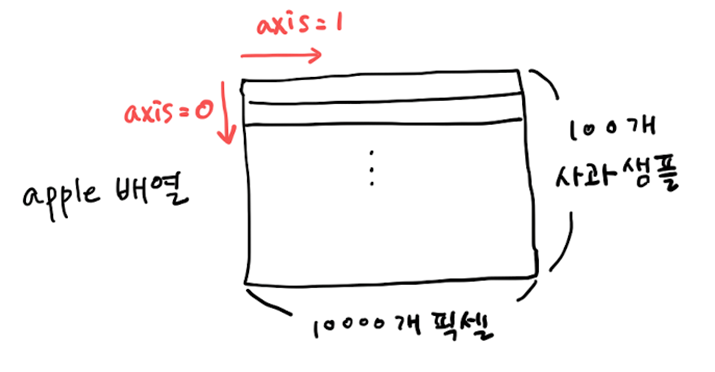

In [26]:
print(pineapple.mean(axis=1))   # 8 x 12 + 4 = 100개 -> 파인애플 하나하나에 대한 픽셀의 평균임

[ 99.3239  87.1622  97.193   97.4689  98.8892  97.8819  95.1444  92.9461
  95.8412  96.9487  93.2863 101.2771  91.6511  98.3901  84.3277 100.7017
  99.0229  87.5298  99.4109  91.8568  90.3877  99.5066  95.8498  96.0728
 100.0062  95.5283  95.2715  98.1624  93.1395  99.1666  99.9519  96.732
  94.16   100.7644 101.1263  98.2852  98.5354 101.3809  95.4862  93.1256
  87.6404  93.7146  94.7279  85.5131  95.0937  95.3236  92.7696  94.4375
  99.36    95.8924  97.8221  99.4014  99.325   95.025   97.5771  97.3511
  99.4891  97.366  101.0062  91.2304  95.2824  95.3544 101.4657  97.5239
  98.8419  96.746   98.2922  96.3969  81.9464  93.4927  97.3872  82.4883
  95.3665  95.2541 101.3074  97.2391  95.4544 100.5576 100.2927  94.3088
  95.7401  97.0982  96.9559  92.9114  97.4164 100.769   97.808   99.2481
 101.0643  94.8173  99.2639  98.8539  97.2198  97.0201  94.5039  98.097
  95.0201  98.8078  99.4634 100.0257]


In [27]:
print(banana.mean(axis=1)) # 8 x 12 + 4 = 100개 -> 바나나 하나하나에 대한 픽셀의 평균임

[19.5487 24.4884 36.7517 18.568  53.572  31.5789 51.9062 28.4703 23.7856
 32.1295 29.1737 24.5578 27.7676 41.3082 61.0437 32.6444 38.4187 30.4175
 30.0639 21.4994 32.6018 39.6335 47.8397 57.7484 33.6511 23.5018 49.6817
 44.0855 46.1559 33.4963 36.0099 69.0751 33.9575 32.8786 60.1911 32.9949
 45.3359 56.1694 36.9218 25.6754 32.7901 29.0245 57.7134 44.6563 31.2138
 29.836  40.9228 23.7501 43.1543 32.3716 26.0986 55.6189 22.2269 29.5089
 24.0435 22.6247 24.1709 46.2714 32.0763 42.5076 44.5522 24.0199 27.68
 32.4377 19.2198 22.5083 19.6742 26.1852 25.8368 25.2676 26.4721 34.8503
 28.5235 80.8545 36.9371 47.3975 18.7909 33.0428 37.8222 34.7819 33.6051
 24.3963 32.7988 19.7609 32.538  28.5407 23.0999 26.3778 27.1965 38.7848
 18.7648 30.2297 54.3816 37.9073 32.3126 31.0664 33.1657 37.6051 38.1806
 26.2805]


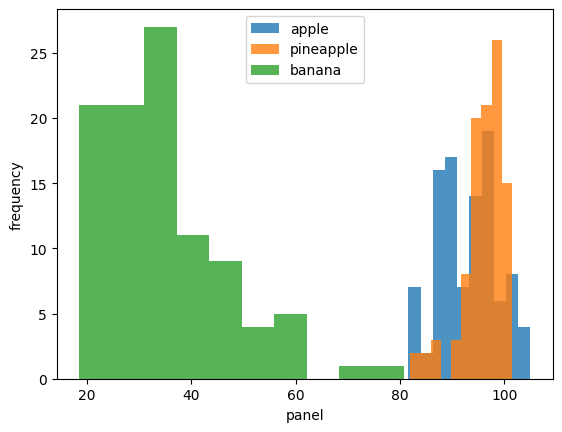

In [32]:
# 히스토그램 : 값이 발생한 빈도를 그래프로 표시함
# x축이 값의 구산(계급), y축은 발생빈도(도수)(막대그래프)
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana']) # 범례(순서대로)
plt.xlabel('panel') # 구간
plt.ylabel('frequency') # 빈도
plt.show()
# 바나나는 길고 사과나 파인애플은 둥글기에 평균값이 차이남
# 바나나 사진은 평균이 40점에 집중되어 있고 사과와 파인애플은 90~100사이에 많이 있다.
# 바나나가 길어서 공간이 많음, 사과와 파인애플은 둥글기 때문에 공간이 많이 없다.

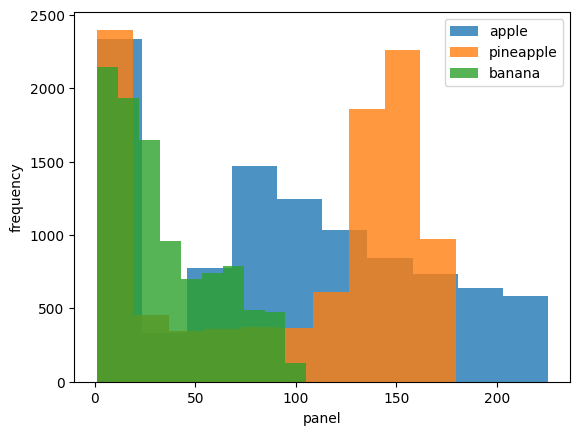

In [35]:
# 개선해보기 위해서 axis=0으로 변경해보면 어떨까?

plt.hist(np.mean(apple, axis=0), alpha=0.8)
plt.hist(np.mean(pineapple, axis=0), alpha=0.8)
plt.hist(np.mean(banana, axis=0), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana']) # 범례(순서대로)
plt.xlabel('panel') # 구간
plt.ylabel('frequency') # 빈도
plt.show()
# 결론 세로 픽셀로 평균을 구했더니 더 엉망인 데이터가 나왔다.

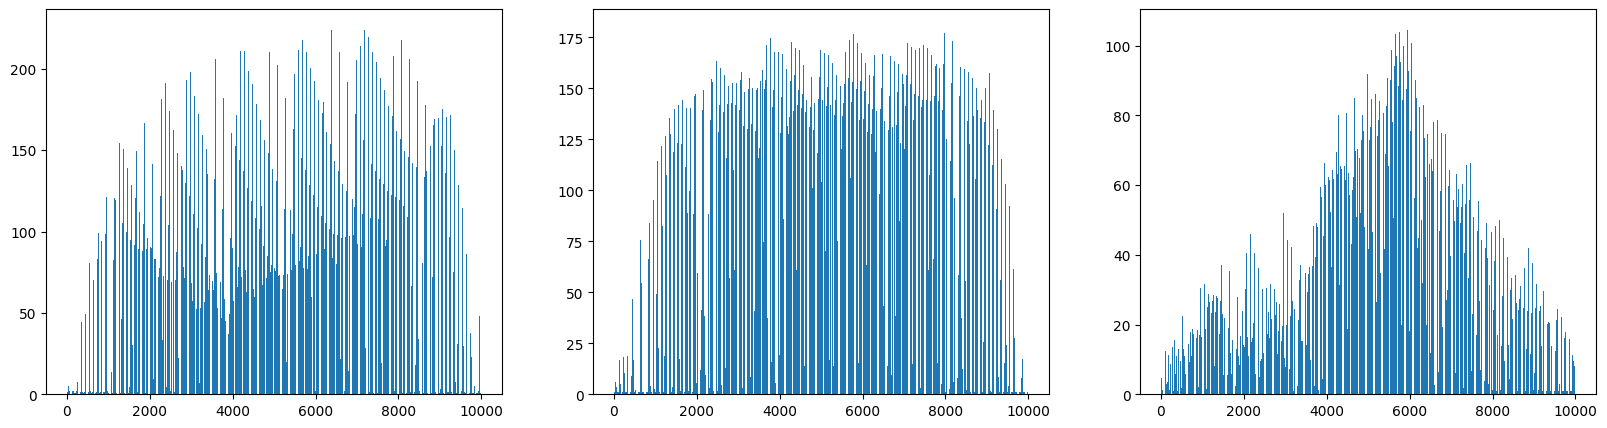

In [38]:
# 샘플의 평균 값이 아니라 픽셀별 평균값을 비교해보자! (픽셀값이 높은 위치가 조금 다름)
fig, axs = plt.subplots(1, 3, figsize=(20,5 ))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

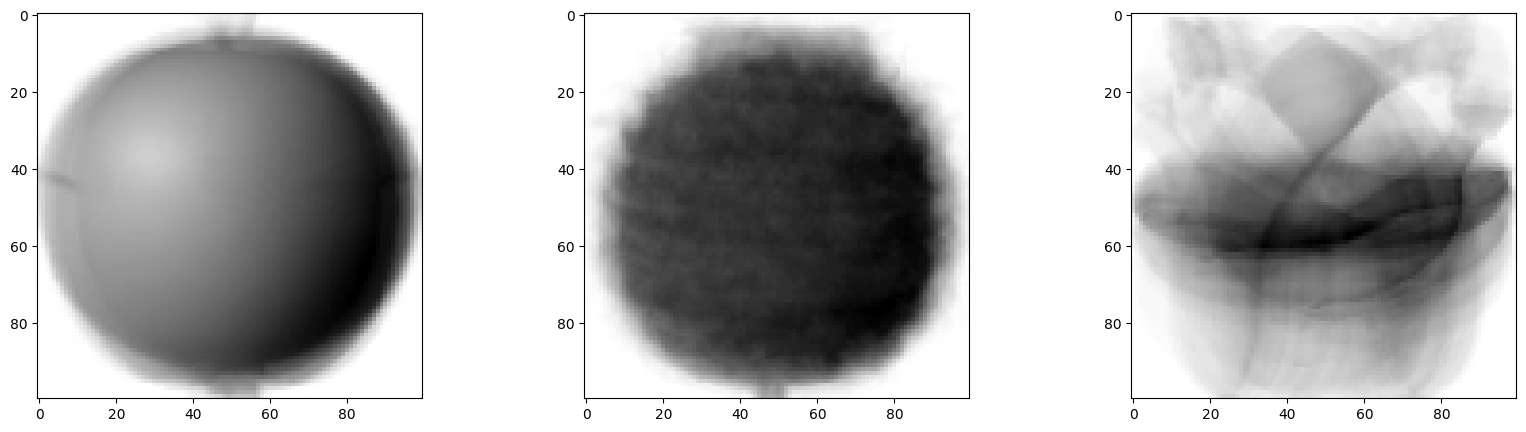

In [40]:
# 결론 픽셀의 평균으로는 특징을 찾기 힘들다.
# 픽셀을 다 모아 평균을 내고 이미지로 출력 해보자.

# 픽셀의 평균값을 100x100으로 바꾸고 이미지처럼 출력
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean , cmap='gray_r')
axs[1].imshow(pineapple_mean , cmap='gray_r')
axs[2].imshow(banana_mean , cmap='gray_r')
plt.show()


In [45]:
# 100개씩 평균낸 값과 300개 중 가까운 사진 고르기

abs_diff = np.abs(fruits - apple_mean)
# apple_mean과 가장 가까운 사진을 고르기 위해서 절대값 오차를 사용해보겠다.
# 넘파이 abs()는 절대값을 계산하는 함수임 -> 절대값은 -를 없앰 (np.abs(-1) -> 1)

abs_mean = np.mean(abs_diff, axis=(1,2))
# 배열에 사용하면 모든 원소의 절대값을 계산하여 입력과 동일한 크기의 배열을 반환
# np.abs와 np.absolute()는 유사함

print(abs_mean.shape)


(300,)


In [46]:
print(abs_mean)
# 300개의 과일에서 100개의 사과 평균을 뺀 값 -> 오름차순 정렬하면 가장 가까운 사과가 나오겠지?

[17.37576  13.508874 17.183394 15.68311  17.983306 20.565392 16.795812
 16.144276 19.611994 21.32059  16.454222 16.590134 13.37039  17.23263
 15.92806  15.496638 18.582212 16.48196  27.651556 19.7871   20.826912
 16.417934 17.059946 15.904296 15.086176 19.371364 24.076362 14.777732
 19.20517  20.805182 14.797906 18.658418 15.973216 13.04259  18.381052
 16.59904  16.288504 18.960586 13.88574  16.497594 18.40376  19.174642
 29.096702 18.40849  28.223962 21.42994  19.740466 15.590532 13.082678
 18.765996 14.391198 21.464746 26.261028 15.887148 18.568706 16.410426
 17.108034 13.178824 18.199846 13.503056 20.845032 16.898184 22.81774
 18.99896  19.102706 16.636216 14.845644 19.357872 14.778086 14.468082
 13.085526 15.946606 20.42774  16.241996 13.720382 18.416166 15.229106
 16.411342 13.47148  20.050622 17.296816 21.071312 18.451708 19.645494
 15.585712 20.582004 13.850318 13.269222 21.875262 17.152098 15.60477
 23.890138 14.442124 18.794826 15.750524 16.58135  19.375552 17.802096
 15.47841